<a href="https://www.kaggle.com/sofiaacar/cnn-cat-dog-classification?scriptVersionId=90366647" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow.config import list_physical_devices
print("Num GPUs Available: ", len(list_physical_devices('GPU')))

Num GPUs Available:  1


2022-03-17 15:00:22.554954: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 15:00:22.815038: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 15:00:22.816250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [4]:
pwd

'/kaggle/working'

In [5]:
my_data_dir = '../input/cnn-project/data'

In [6]:
os.listdir(my_data_dir) 

['validation', 'test', 'train']

In [7]:
train_path = my_data_dir+'/train/'
test_path = my_data_dir+'/test/'
validation_path = my_data_dir+'/validation/'

In [8]:
os.listdir(train_path)

['dog', 'cat']

In [9]:
os.listdir(validation_path)

['dog', 'cat']

In [10]:
os.listdir(test_path)[:20]

['6234.jpg',
 '3863.jpg',
 '6241.jpg',
 '10304.jpg',
 '11925.jpg',
 '3750.jpg',
 '11378.jpg',
 '10730.jpg',
 '5982.jpg',
 '10597.jpg',
 '6588.jpg',
 '10054.jpg',
 '3919.jpg',
 '6197.jpg',
 '10924.jpg',
 '6399.jpg',
 '3757.jpg',
 '4489.jpg',
 '3138.jpg',
 '10213.jpg']

In [11]:
os.listdir(train_path)

['dog', 'cat']

In [12]:
os.listdir(train_path+'cat')[:20]

['cat.12461.jpg',
 'cat.10176.jpg',
 'cat.8194.jpg',
 'cat.3498.jpg',
 'cat.891.jpg',
 'cat.6912.jpg',
 'cat.6932.jpg',
 'cat.2842.jpg',
 'cat.8762.jpg',
 'cat.10692.jpg',
 'cat.7083.jpg',
 'cat.1.jpg',
 'cat.9820.jpg',
 'cat.115.jpg',
 'cat.3921.jpg',
 'cat.6212.jpg',
 'cat.11191.jpg',
 'cat.7488.jpg',
 'cat.4414.jpg',
 'cat.8583.jpg']

In [13]:
os.listdir(train_path+'cat')[10]

'cat.7083.jpg'

In [14]:
cat_image = '/kaggle/input/cnn-project/data/train/cat/cat.7083.jpg'

In [15]:
imread(cat_image)

array([[[178, 177, 175],
        [179, 178, 176],
        [179, 178, 176],
        ...,
        [153, 155, 150],
        [153, 155, 150],
        [153, 155, 150]],

       [[178, 177, 175],
        [179, 178, 176],
        [180, 179, 177],
        ...,
        [153, 155, 150],
        [153, 155, 150],
        [153, 155, 150]],

       [[179, 178, 176],
        [179, 178, 176],
        [180, 179, 177],
        ...,
        [154, 156, 151],
        [154, 156, 151],
        [154, 156, 151]],

       ...,

       [[105,  65,  73],
        [105,  65,  73],
        [106,  65,  73],
        ...,
        [ 91,  55,  55],
        [ 91,  55,  55],
        [ 91,  55,  55]],

       [[105,  65,  73],
        [105,  65,  73],
        [106,  65,  73],
        ...,
        [ 91,  55,  55],
        [ 91,  55,  55],
        [ 91,  55,  55]],

       [[105,  65,  73],
        [105,  65,  73],
        [106,  65,  73],
        ...,
        [ 91,  55,  55],
        [ 91,  55,  55],
        [ 91,  55,  55]]

In [16]:
cat_img= imread(cat_image)

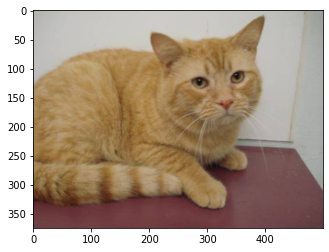

In [17]:
plt.imshow(cat_img);

In [18]:
cat_img.shape

(375, 499, 3)

In [19]:
os.listdir(train_path+'dog')[:20]

['dog.10728.jpg',
 'dog.1942.jpg',
 'dog.10577.jpg',
 'dog.10063.jpg',
 'dog.10500.jpg',
 'dog.11327.jpg',
 'dog.1494.jpg',
 'dog.222.jpg',
 'dog.11780.jpg',
 'dog.2680.jpg',
 'dog.12325.jpg',
 'dog.11766.jpg',
 'dog.2618.jpg',
 'dog.1956.jpg',
 'dog.2875.jpg',
 'dog.1350.jpg',
 '2628.jpg',
 'dog.12035.jpg',
 'dog.2314.jpg',
 'dog.2888.jpg']

In [20]:
dog_image = '/kaggle/input/cnn-project/data/train/dog/dog.2618.jpg'

In [21]:
imread(dog_image)

array([[[ 14,  15,   9],
        [  7,   8,   2],
        [ 19,  20,  14],
        ...,
        [207, 220, 213],
        [211, 224, 217],
        [220, 233, 226]],

       [[ 11,  12,   7],
        [  3,   4,   0],
        [ 16,  17,  11],
        ...,
        [208, 221, 214],
        [211, 224, 217],
        [220, 233, 226]],

       [[ 11,  12,   7],
        [  2,   3,   0],
        [ 14,  15,   9],
        ...,
        [210, 221, 215],
        [213, 224, 218],
        [222, 233, 227]],

       ...,

       [[196, 203, 196],
        [194, 201, 193],
        [192, 198, 188],
        ...,
        [221, 234, 225],
        [222, 235, 226],
        [223, 236, 227]],

       [[207, 212, 205],
        [203, 209, 199],
        [202, 205, 194],
        ...,
        [221, 234, 225],
        [222, 235, 226],
        [223, 236, 227]],

       [[204, 209, 202],
        [201, 207, 197],
        [199, 202, 191],
        ...,
        [221, 234, 225],
        [222, 235, 226],
        [223, 236, 227]]

In [22]:
dog_img= imread(dog_image)

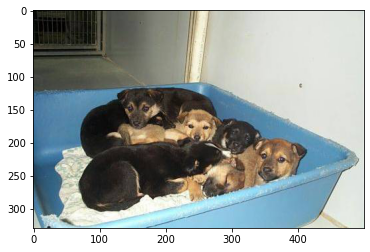

In [23]:
plt.imshow(dog_img);

**Let's check how many images there are :**

In [24]:
len(os.listdir(train_path+'cat'))

12500

In [25]:
len(os.listdir(train_path+'dog'))

5026

**Let's find out the average dimensions of these images :**

In [26]:
cat_img.shape

(375, 499, 3)

In [27]:
dog_img.shape

(329, 500, 3)

In [28]:
image_shape = (128,128,3)

## Preparing the Data for the model

In [29]:
cat_img.max()

216

In [30]:
dog_img.max()

255

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
#help(ImageDataGenerator)

In [33]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

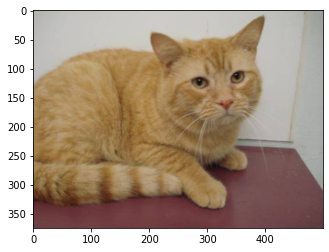

In [34]:
plt.imshow(cat_img);

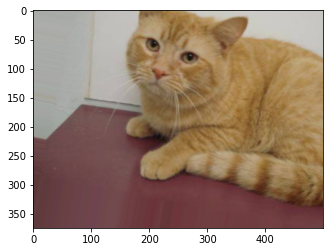

In [35]:
plt.imshow(image_gen.random_transform(cat_img));

In [36]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [37]:
image_gen.flow_from_directory(validation_path)

Found 2290 images belonging to 2 classes.


In [38]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


## Creating the Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [40]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2022-03-17 15:01:16.517756: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-17 15:01:16.519431: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 15:01:16.520526: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 15:01:16.521501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 256)       0

### Early Stopping

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [44]:
batch_size = 32
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(128,128),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42)

Found 17526 images belonging to 2 classes.


In [45]:
validation_image_gen = image_gen.flow_from_directory(validation_path,
                                               target_size=(128,128),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42)

Found 2290 images belonging to 2 classes.


In [46]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [47]:
validation_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [48]:
STEP_SIZE_TRAIN=train_image_gen.n//train_image_gen.batch_size
STEP_SIZE_VALIDATION=validation_image_gen.n//validation_image_gen.batch_size

In [49]:
STEP_SIZE_TRAIN, STEP_SIZE_VALIDATION

(547, 71)

In [50]:
results = model.fit(train_image_gen,epochs=20,
                    validation_data=validation_image_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_steps=STEP_SIZE_VALIDATION,
                    callbacks=[early_stop])

2022-03-17 15:01:27.193939: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-03-17 15:01:29.368769: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


547/547 [==============================] - 271s 481ms/step - loss: 0.6036 - accuracy: 0.7133 - val_loss: 0.7585 - val_accuracy: 0.5321
Epoch 2/20
547/547 [==============================] - 138s 252ms/step - loss: 0.5985 - accuracy: 0.7132 - val_loss: 0.7307 - val_accuracy: 0.5335
Epoch 3/20
547/547 [==============================] - 139s 255ms/step - loss: 0.5973 - accuracy: 0.7128 - val_loss: 0.7391 - val_accuracy: 0.5335
Epoch 4/20
547/547 [==============================] - 140s 255ms/step - loss: 0.5775 - accuracy: 0.7150 - val_loss: 0.7157 - val_accuracy: 0.5352
Epoch 5/20
547/547 [==============================] - 139s 254ms/step - loss: 0.5342 - accuracy: 0.7367 - val_loss: 0.7397 - val_accuracy: 0.6215
Epoch 6/20
547/547 [==============================] - 140s 256ms/step - loss: 0.4857 - accuracy: 0.7730 - val_loss: 0.5549 - val_accuracy: 0.7271
Epoch 7/20
547/547 [==============================] - 139s 255ms/step - loss: 0.4536 - accuracy: 0.7955 - val_loss: 0.6464 - val_accura

In [51]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.603627,0.713273,0.758528,0.532130
1,0.598517,0.713216,0.730716,0.533451
2,0.597296,0.712816,0.739135,0.533451
3,0.577528,0.715045,0.715700,0.535211
4,0.534165,0.736710,0.739695,0.621479


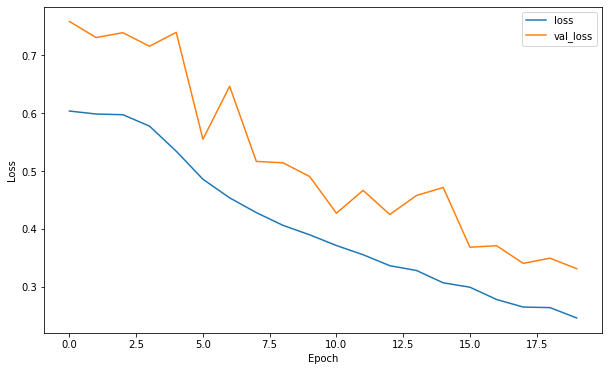

In [52]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

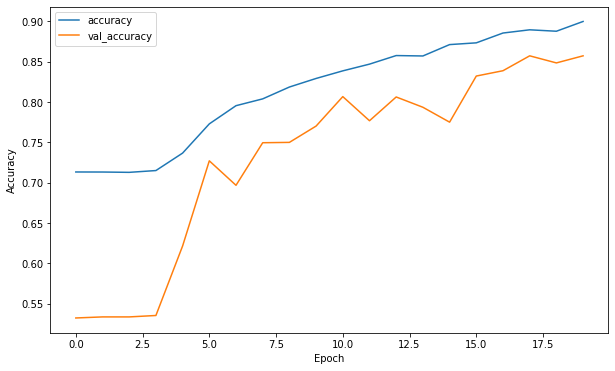

In [53]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [54]:
model.metrics_names

['loss', 'accuracy']

In [55]:
model.evaluate(validation_image_gen,
steps=STEP_SIZE_VALIDATION)

71/71 [==============================] - 15s 212ms/step - loss: 0.3274 - accuracy: 0.8587


[0.32740095257759094, 0.858714759349823]

In [56]:
from tensorflow.keras.preprocessing import image

In [57]:
validation_image_gen = image_gen.flow_from_directory(validation_path,
                                               target_size=(128,128),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=False, seed=42)

Found 2290 images belonging to 2 classes.


In [58]:
pred_probabilities = model.predict_generator(validation_image_gen)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [59]:
pred_probabilities

array([[9.9794903e-05],
       [1.2641178e-01],
       [1.8832055e-01],
       ...,
       [9.5662236e-01],
       [9.9994361e-01],
       [9.9802977e-01]], dtype=float32)

In [60]:
validation_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [61]:
predictions = pred_probabilities > 0.5

In [62]:
predictions[:100]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(validation_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1219
           1       0.93      0.72      0.81      1071

    accuracy                           0.84      2290
   macro avg       0.86      0.84      0.84      2290
weighted avg       0.86      0.84      0.84      2290



In [65]:
confusion_matrix(validation_image_gen.classes,predictions)

array([[1157,   62],
       [ 296,  775]])

## Prediction

In [66]:
from PIL import Image

In [67]:
os.listdir(test_path)[:20]

['6234.jpg',
 '3863.jpg',
 '6241.jpg',
 '10304.jpg',
 '11925.jpg',
 '3750.jpg',
 '11378.jpg',
 '10730.jpg',
 '5982.jpg',
 '10597.jpg',
 '6588.jpg',
 '10054.jpg',
 '3919.jpg',
 '6197.jpg',
 '10924.jpg',
 '6399.jpg',
 '3757.jpg',
 '4489.jpg',
 '3138.jpg',
 '10213.jpg']

In [68]:
test_image = test_path+'/10054.jpg'
test_image

'../input/cnn-project/data/test//10054.jpg'

In [69]:
test_img= imread(test_image)
test_img

array([[[166, 177, 169],
        [155, 166, 158],
        [175, 184, 179],
        ...,
        [ 79,  80,  74],
        [ 87,  88,  82],
        [ 92,  93,  87]],

       [[164, 175, 167],
        [160, 171, 163],
        [175, 184, 179],
        ...,
        [ 33,  34,  28],
        [ 27,  28,  22],
        [ 28,  29,  23]],

       [[161, 172, 164],
        [166, 177, 169],
        [174, 183, 178],
        ...,
        [ 69,  72,  65],
        [ 61,  64,  57],
        [ 50,  53,  46]],

       ...,

       [[102, 110, 112],
        [103, 111, 113],
        [104, 112, 114],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[102, 110, 112],
        [102, 110, 112],
        [104, 112, 114],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[102, 110, 112],
        [103, 111, 113],
        [104, 112, 114],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]]

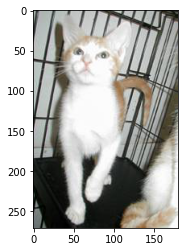

In [70]:
plt.imshow(test_img);

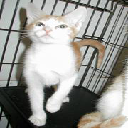

In [71]:
test_img = image.load_img(test_image,target_size=image_shape)
test_img

In [72]:
type(test_img)

PIL.Image.Image

In [73]:
test_img = image.img_to_array(test_img)

In [74]:
type(test_img)

numpy.ndarray

In [75]:
test_img.shape

(128, 128, 3)

In [76]:
test_img = np.expand_dims(test_img, axis=0)

In [77]:
test_img.shape

(1, 128, 128, 3)

In [78]:
model.predict(test_img)

array([[0.]], dtype=float32)

In [79]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [80]:
validation_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [81]:
model.save('cat-dog_classification.h5')